# Read Data

In [1]:
%%capture
%pip install pandas;
%pip install matplotlib;
%pip install numpy;
%pip install scikit-learn;
%pip install statsmodel     s;

In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import warnings
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import STL
from sklearn.linear_model import LinearRegression
warnings.filterwarnings("ignore", category=UserWarning)


In [3]:

df = pd.read_csv("../data/DAYTON_Hourly.csv")

data_numeric = df.iloc[:, 1:]

df

,Datetime,DAYTON_MW
0,2004-12-31 01:00:00,1596.0
1,2004-12-31 02:00:00,1517.0
2,2004-12-31 03:00:00,1486.0
3,2004-12-31 04:00:00,1469.0
4,2004-12-31 05:00:00,1472.0
...,...,...
121270,2018-01-01 20:00:00,2732.0
121271,2018-01-01 21:00:00,2724.0
121272,2018-01-01 22:00:00,2664.0
121273,2018-01-01 23:00:00,2614.0


In [4]:
df['Datetime'] = pd.to_datetime(df['Datetime'])

# Set the 'Datetime' column as the index
df.set_index('Datetime', inplace=True)


# Check for and handle duplicate index labels
df = df[~df.index.duplicated(keep='first')]

# Calculate summary statistics
summary_stats = df['DAYTON_MW'].describe()

# Print the summary statistics
print(summary_stats)

count    121271.000000
mean       2037.872006
std         393.392105
min         982.000000
25%        1749.000000
50%        2009.000000
75%        2279.000000
max        3746.000000
Name: DAYTON_MW, dtype: float64


In [5]:
mean_energy_consumption = summary_stats['mean']
median_energy_consumption = summary_stats['50%']  # Median
min_energy_consumption = summary_stats['min']
max_energy_consumption = summary_stats['max']

print("Mean energy consumption:", mean_energy_consumption)
print("Median energy consumption:", median_energy_consumption)
print("Minimum energy consumption:", min_energy_consumption)
print("Maximum energy consumption:", max_energy_consumption)


Mean energy consumption: 2037.8720056732443
Median energy consumption: 2009.0
Minimum energy consumption: 982.0
Maximum energy consumption: 3746.0


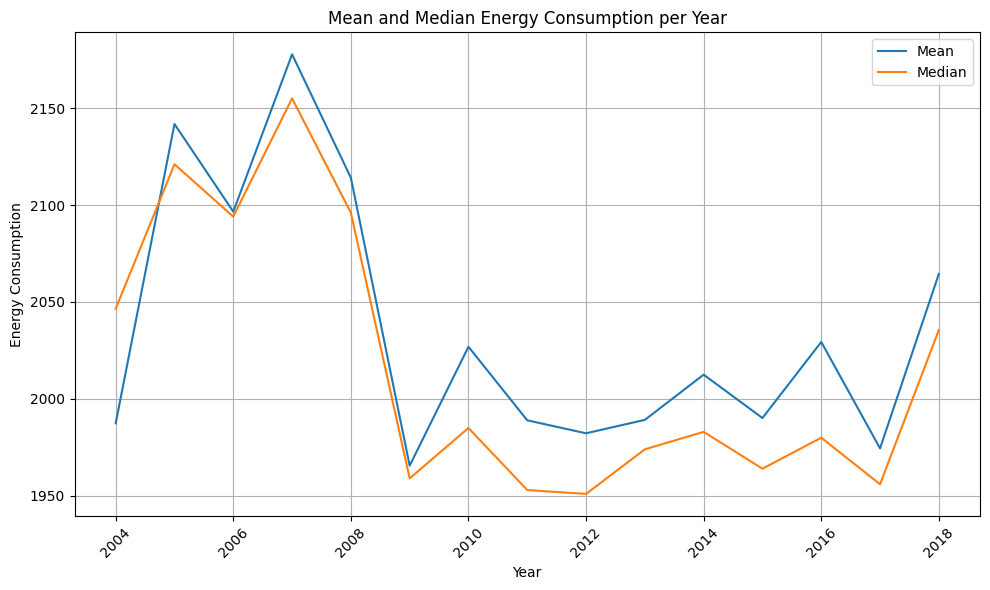

Datetime
2004-12-31    2046.5
2005-12-31    2121.0
2006-12-31    2094.0
2007-12-31    2155.0
2008-12-31    2096.0
2009-12-31    1959.0
2010-12-31    1985.0
2011-12-31    1953.0
2012-12-31    1951.0
2013-12-31    1974.0
2014-12-31    1983.0
2015-12-31    1964.0
2016-12-31    1980.0
2017-12-31    1956.0
2018-12-31    2035.5
Freq: YE-DEC, Name: DAYTON_MW, dtype: float64


In [24]:
yearly_mean = df['DAYTON_MW'].resample('YE').mean()
yearly_median = df['DAYTON_MW'].resample('YE').median()

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(yearly_mean.index.year, yearly_mean, label='Mean')
plt.plot(yearly_median.index.year, yearly_median, label='Median')
plt.xlabel('Year')
plt.ylabel('Energy Consumption')
plt.title('Mean and Median Energy Consumption per Year')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print(yearly_median)

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 121271 entries, 2004-12-31 01:00:00 to 2018-01-02 00:00:00
Data columns (total 1 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   DAYTON_MW  121271 non-null  float64
dtypes: float64(1)
memory usage: 1.9 MB


In [8]:
# Then, resample the data to yearly frequency and calculate the mean
df_yearly_mean = df.resample('YE').mean()
# # Specify the frequency of the time series data
# df = df.asfreq('YE')



In [9]:
df_yearly_mean

,DAYTON_MW
Datetime,
2004-12-31,1987.417951
2005-12-31,2141.773008
2006-12-31,2096.553323
2007-12-31,2177.711921
2008-12-31,2114.041790
2009-12-31,1965.575816
2010-12-31,2026.887290
2011-12-31,1988.952843
2012-12-31,1982.261330


In [10]:
stl = STL(df_yearly_mean['DAYTON_MW'], period=365)
result = stl.fit()

Seasonal Indices:
Datetime
12    1649.092204
Name: season, dtype: float64


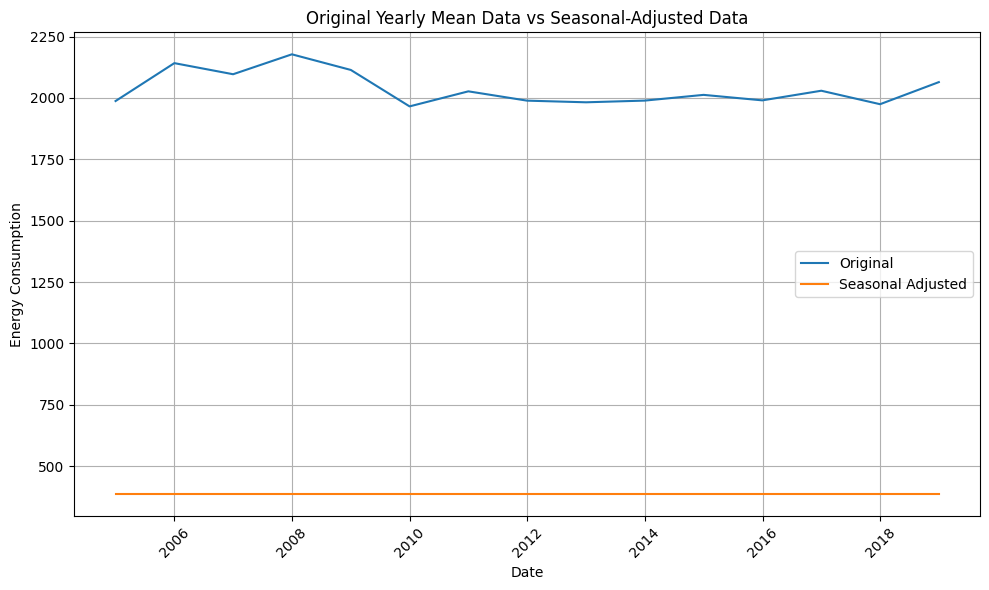

In [11]:
# Calculate seasonal indices
seasonal_indices = result.seasonal.groupby(result.seasonal.index.month).mean()
# Print seasonal indices
print("Seasonal Indices:")
print(seasonal_indices)

# Perform seasonal adjustment
seasonal_adjusted = df_yearly_mean['DAYTON_MW'] - result.seasonal
# Plot the original data and the seasonal-adjusted data
plt.figure(figsize=(10, 6))
plt.plot(df_yearly_mean.index, df_yearly_mean['DAYTON_MW'], label='Original')
plt.plot(seasonal_adjusted.index, seasonal_adjusted, label='Seasonal Adjusted')
plt.xlabel('Date')
plt.ylabel('Energy Consumption')
plt.title('Original Yearly Mean Data vs Seasonal-Adjusted Data')
plt.legend()
plt.grid(True)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Strong Seasonal Pattern: If the seasonal-adjusted data appears as a straight line with very little variation, it implies that the seasonal component has been effectively removed from the original data. This could mean that the energy consumption exhibits a very predictable pattern over time, likely influenced by factors such as seasonal changes in weather, economic activity, or human behavior.

In [12]:
# Load Weather data

weatherdf = pd.read_csv("../data/city_temperature.csv")

weatherdf.info()

C:\Users\solme\AppData\Local\Temp\ipykernel_14640\1039166524.py:3: DtypeWarning: Columns (2) have mixed types. Specify dtype option on import or set low_memory=False.
  weatherdf = pd.read_csv("../data/city_temperature.csv")


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2906327 entries, 0 to 2906326
Data columns (total 8 columns):
 #   Column          Dtype  
---  ------          -----  
 0   Region          object 
 1   Country         object 
 2   State           object 
 3   City            object 
 4   Month           int64  
 5   Day             int64  
 6   Year            int64  
 7   AvgTemperature  float64
dtypes: float64(1), int64(3), object(4)
memory usage: 177.4+ MB


In [13]:
# Filter the data for Dayton, Ohio, United States and for the years 2004-2018
filtered_data = weatherdf[(weatherdf['City'] == 'Dayton') & 
                          (weatherdf['State'] == 'Ohio') & 
                          (weatherdf['Country'] == 'US') & 
                          (weatherdf['Year'] >= 2004) & 
                          (weatherdf['Year'] <= 2018)]

# Display the filtered data
print(filtered_data)

                Region Country State    City  Month  Day  Year  AvgTemperature
2415295  North America      US  Ohio  Dayton      1    1  2004            37.1
2415296  North America      US  Ohio  Dayton      1    2  2004            48.1
2415297  North America      US  Ohio  Dayton      1    3  2004            56.0
2415298  North America      US  Ohio  Dayton      1    4  2004            39.3
2415299  North America      US  Ohio  Dayton      1    5  2004            32.2
...                ...     ...   ...     ...    ...  ...   ...             ...
2420769  North America      US  Ohio  Dayton     12   27  2018            39.4
2420770  North America      US  Ohio  Dayton     12   28  2018            52.7
2420771  North America      US  Ohio  Dayton     12   29  2018            34.2
2420772  North America      US  Ohio  Dayton     12   30  2018            33.3
2420773  North America      US  Ohio  Dayton     12   31  2018            43.2

[5479 rows x 8 columns]


In [14]:
filtered_df = filtered_data[['City','Year', 'AvgTemperature']]

In [15]:
filtered_df.head()

,City,Year,AvgTemperature
2415295,Dayton,2004,37.1
2415296,Dayton,2004,48.1
2415297,Dayton,2004,56.0
2415298,Dayton,2004,39.3
2415299,Dayton,2004,32.2


In [16]:
# Group by year and calculate the mean temperature for each year
yearly_avg_temp = filtered_df.groupby('Year')['AvgTemperature'].mean()

# Convert the series to a DataFrame
yearly_avg_temp_df = yearly_avg_temp.reset_index()

yearly_avg_temp_df

,Year,AvgTemperature
0,2004,51.892350
1,2005,52.229863
2,2006,53.140822
3,2007,52.804110
4,2008,50.290164
5,2009,51.088219
6,2010,52.698356
7,2011,53.253151
8,2012,55.422951
9,2013,52.373699


In [27]:
df_yearly_mean

,DAYTON_MW,Year
Datetime,,
2004-12-31,1987.417951,2004
2005-12-31,2141.773008,2005
2006-12-31,2096.553323,2006
2007-12-31,2177.711921,2007
2008-12-31,2114.041790,2008
2009-12-31,1965.575816,2009
2010-12-31,2026.887290,2010
2011-12-31,1988.952843,2011
2012-12-31,1982.261330,2012


In [18]:
df_yearly_mean['Year'] = df_yearly_mean.index.year


In [19]:
df_yearly_mean.head()

,DAYTON_MW,Year
Datetime,,
2004-12-31,1987.417951,2004
2005-12-31,2141.773008,2005
2006-12-31,2096.553323,2006
2007-12-31,2177.711921,2007
2008-12-31,2114.041790,2008


In [20]:
combined_df = pd.merge(df_yearly_mean, yearly_avg_temp_df, on='Year')

combined_df.head()

,DAYTON_MW,Year,AvgTemperature
0,1987.417951,2004,51.892350
1,2141.773008,2005,52.229863
2,2096.553323,2006,53.140822
3,2177.711921,2007,52.804110
4,2114.041790,2008,50.290164


In [21]:
combined_df['Year'] = combined_df['Year'].astype('category')

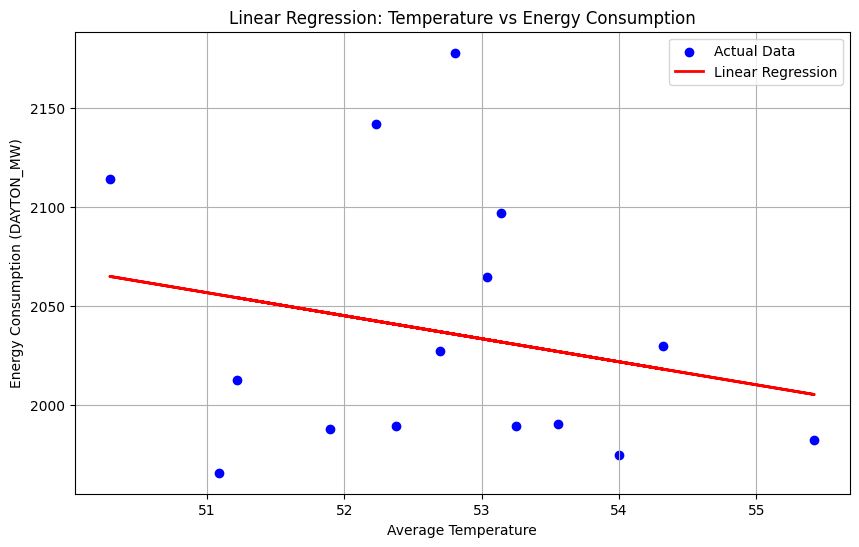

Intercept: 2649.413971229923
Coefficient: [-11.62590644]


In [25]:
# Convert the 'Year' column to categorical type if it's not already
combined_df['Year'] = combined_df['Year'].astype('category')

# Separate the independent variable (temperature) and dependent variable (energy consumption)
X = combined_df[['AvgTemperature']]
y = combined_df['DAYTON_MW']

# Initialize and fit the linear regression model
model = LinearRegression()
model.fit(X, y)

# Predict energy consumption using the fitted model
y_pred = model.predict(X)

# Plot the original data and the regression line
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', linewidth=2, label='Linear Regression')
plt.xlabel('Average Temperature')
plt.ylabel('Energy Consumption (DAYTON_MW)')
plt.title('Linear Regression: Temperature vs Energy Consumption')
plt.legend()
plt.grid(True)
plt.show()

# Print the coefficients of the linear regression model
print("Intercept:", model.intercept_)
print("Coefficient:", model.coef_)

In [26]:
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
import numpy as np

# Calculate R-squared
r_squared = r2_score(y, y_pred)
                                                                                                                                                                                                                    
# Calculate Mean Squared Error (MSE)
mse = mean_squared_error(y, y_pred)

# Calculate Mean Absolute Error (MAE)
mae = mean_absolute_error(y, y_pred)

# Calculate Root Mean Squared Error (RMSE)
rmse = np.sqrt(mse)

# Print the evaluation metrics
print("R-squared:", r_squared)
print("Mean Squared Error (MSE):", mse)
print("Mean Absolute Error (MAE):", mae)
print("Root Mean Squared Error (RMSE):", rmse)

R-squared: 0.05279940214205714
Mean Squared Error (MSE): 3979.2533932136407
Mean Absolute Error (MAE): 53.22246186486632
Root Mean Squared Error (RMSE): 63.08132364823713
